## Evaluating Log Files

In [3]:
import pandas as pd
import numpy as np
from pprint import pprint
import matplotlib.pyplot as plt
import os

In [120]:
for file in os.listdir('./log'):
    print(file)

log_file (2).csv
log_file _17_epochs and .csv
log_file.csv
log_file_120 epoch-1e-4 and 32 batch size.csv
log_file_149 epoch.csv
log_file_150Epoch  64 batch 1e-3.csv
log_file_151 epoch and 100 epoch 1e-4 and 50 epoch 1e-3.csv
log_file_19 epoch testing.csv
log_file_67 epoch, 50 epoch (data for 50 epoch).csv
log_file_saved.csv
loss_curve.jpg
val_conf_loss.jpg
val_loc_loss.jpg


In [121]:
csv_file_name = "log_file_120 epoch-1e-4 and 32 batch size.csv"
log_df = pd.read_csv(f"./log/{csv_file_name}")
log_df.tail(5)

,epoch,conf_accuracy,conf_loss,loc_accuracy,loc_loss,loss,lr,val_conf_accuracy,val_conf_loss,val_loc_accuracy,val_loc_loss,val_loss
115,115,0.009710,0.035541,0.224601,0.330941,0.366482,0.001,0.008470,0.804896,0.200067,0.978015,1.782912
116,116,0.009810,0.032267,0.220253,0.309630,0.341897,0.001,0.009164,0.602613,0.198793,0.879906,1.482518
117,117,0.010224,0.024363,0.229839,0.281339,0.305702,0.001,0.009884,0.553733,0.190767,0.842480,1.396213
118,118,0.010445,0.043352,0.209577,0.319433,0.362785,0.001,0.008800,0.808927,0.182935,1.259817,2.068745
119,119,0.010604,0.033938,0.205830,0.302636,0.336574,0.001,0.008728,1.254557,0.206356,1.242027,2.496584


In [122]:
print(log_df.columns)

Index(['epoch', 'conf_accuracy', 'conf_loss', 'loc_accuracy', 'loc_loss',
       'loss', 'lr', 'val_conf_accuracy', 'val_conf_loss', 'val_loc_accuracy',
       'val_loc_loss', 'val_loss'],
      dtype='object')


In [123]:
def plot_curves(x, y, curve_type = 'loss' ,save = False, save_loc = None):
    plt.figure(figsize = (6, 4), dpi = 90)
    plt.style.use('seaborn-whitegrid')
    font_title = {'size': 12, 'weight': 'bold'}
    font_label = {'size': 10, 'weight': 'bold'}
    batch_size = 64
    trainset_size = 16512
    iterations = len(log_df['epoch']) * (trainset_size / batch_size)

    plt.plot(x, label = 'Train')
    plt.plot(y, label = 'Validation')

    plt.title(f"Train vs Validation {curve_type} Curve", fontdict = font_title)
    plt.xlabel("epochs", fontdict = font_label)
    plt.ylabel(curve_type, fontdict = font_label)
    plt.legend(loc = 'best', title = 'Loss', frameon = True)
    
    if save:
        plt.savefig(save_loc, dpi = 120, bbox_inches = 'tight', pad_inches = 0.3)
    plt.show()

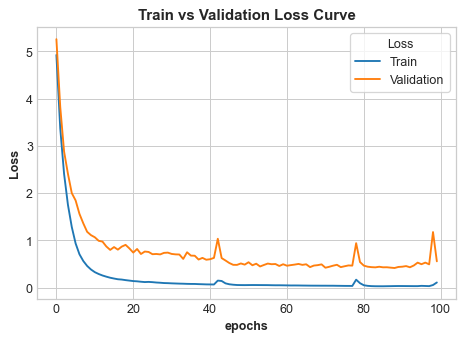

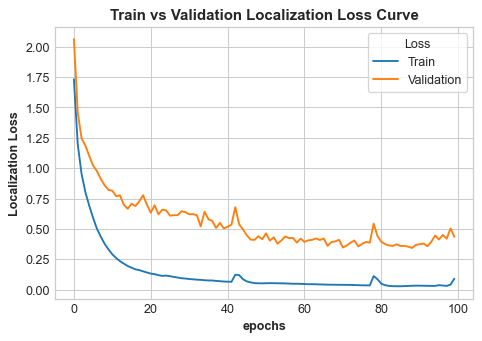

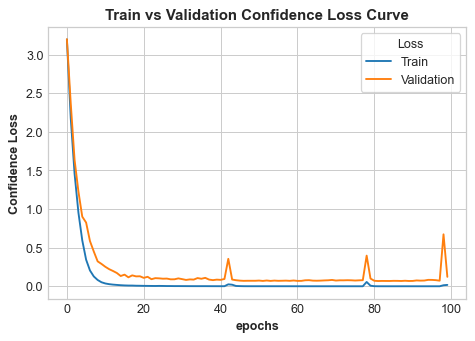

In [126]:
plot_curves(log_df['loss'][:100], log_df['val_loss'][:100], "Loss", True, r"./log/loss_curve.jpg")
plot_curves(log_df['loc_loss'][:100], log_df['val_loc_loss'][:100], 'Localization Loss', True, r"./log/val_loc_loss.jpg")
plot_curves(log_df['conf_loss'][:100], log_df['val_conf_loss'][:100], 'Confidence Loss', True, r"./log/val_conf_loss.jpg")


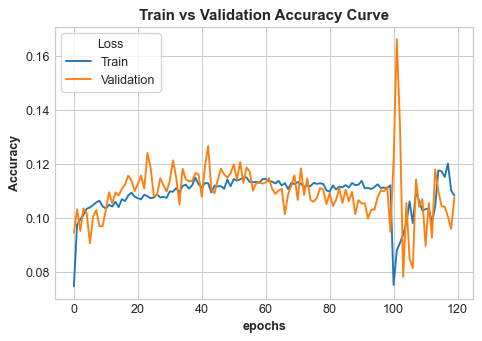

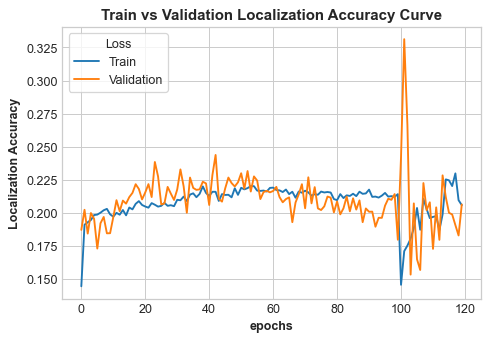

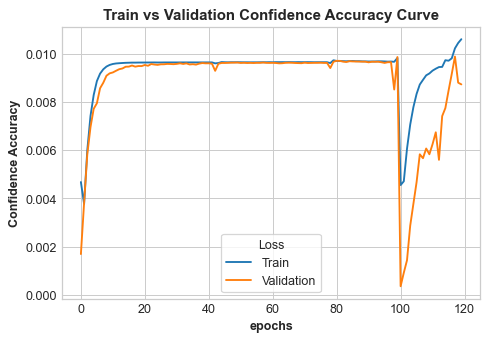

In [125]:
train_accuracy = list(map(lambda x, y: (x + y) / 2, log_df['loc_accuracy'].tolist(), log_df['conf_accuracy'].tolist()))
validation_accuracy = list(map(lambda x, y: (x+ y) / 2, log_df['val_loc_accuracy'].tolist(), log_df['val_conf_accuracy'].tolist()))

plot_curves(np.array(train_accuracy), np.array(validation_accuracy), 'Accuracy')
plot_curves(log_df['loc_accuracy'] , log_df['val_loc_accuracy'], 'Localization Accuracy')
plot_curves(log_df['conf_accuracy'] , log_df['val_conf_accuracy'], 'Confidence Accuracy')
